<a href="https://colab.research.google.com/github/AdityaBaiju/CODSOFT/blob/main/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google Drive and Load the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Loading dataset

In [ ]:
file_path = '/content/drive/MyDrive/codsoft dataset/Titanic-Dataset.csv'

In [ ]:
df = pd.read_csv(file_path)

EDA

In [ ]:
df.head()
df.describe()
df.isnull().sum()
print(df.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


Data preprocessing

In [ ]:
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)
if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)
categorical_columns = ['Sex', 'Embarked']
for column in categorical_columns:
    if column in df.columns:
        df = pd.get_dummies(df, columns=[column], drop_first=True)
columns_to_drop = ['Name', 'Ticket', 'PassengerId']
for column in columns_to_drop:
    if column in df.columns:
        df.drop(columns=[column], inplace=True)

Splitting the Dataset

In [ ]:
if 'Survived' in df.columns:
    X = df.drop('Survived', axis=1)
    y = df['Survived']
else:
    raise KeyError("Column 'Survived' not found in the dataset")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Building and Training the Model

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Evaluation

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



Data visualization

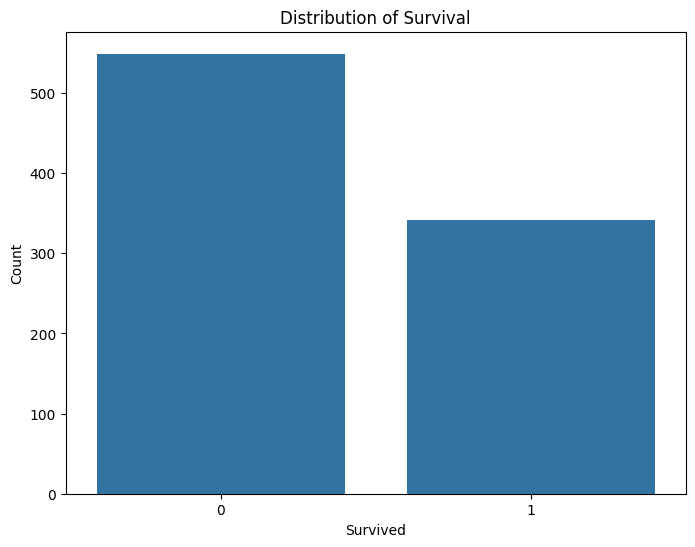

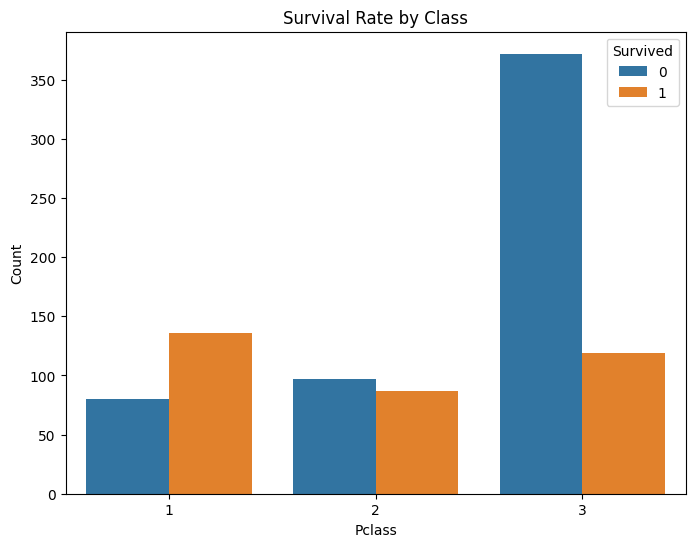

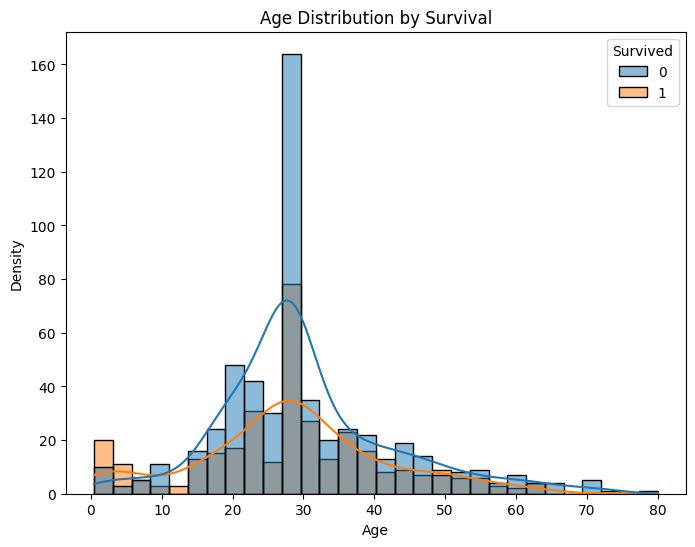

In [ ]:
# Visualization: Distribution of Survival
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Visualization: Survival Rate by Class
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Rate by Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()



# Visualization: Age Distribution by Survival
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

